<a href="https://colab.research.google.com/github/sakshiarya2000/Data-Analyst/blob/main/Session6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_id = "1SJcoCmSKSv2lRfdyKpiypk1cUBaLBD6C"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df.isnull().sum()

,0
Review Id,0
Review,6
Ratings,0
Review Date,0


In [ ]:
df['Review'].fillna("NA", inplace=True)
df.isnull().sum()

/tmp/ipython-input-118-1548502997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna("NA", inplace=True)


,0
Review Id,0
Review,0
Ratings,0
Review Date,0


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns


Index(['Review_Id', 'Review', 'Ratings', 'Review_Date'], dtype='object')

In [ ]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Review_Id    196727 non-null  object        
 1   Review       196727 non-null  object        
 2   Ratings      196727 non-null  int64         
 3   Review_Date  196727 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.0+ MB


In [ ]:
df['Review_Id'].duplicated().sum()

np.int64(3573)

In [ ]:
df['Review_Id'].count()

np.int64(196727)

In [ ]:
df.drop_duplicates(subset='Review_Id', keep='first', inplace=True)

In [ ]:
df['Review_Id'].duplicated().sum()

np.int64(0)

In [ ]:
df['Review_Id'].count()

np.int64(193154)

In [ ]:
df['Ratings'].sort_values(ascending=False)

,Ratings
196726,5
0,5
196710,5
196709,5
196708,5
...,...
56283,1
56307,1
56308,1
72,1


In [ ]:
from textblob import TextBlob
def get_sentiment(Review):
    if pd.isnull(Review) or str(Review).strip() == 'NA':
        return 'neutral'
    blob = TextBlob(str(Review))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment'] = df['Review'].apply(get_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
positive,147560
neutral,37705
negative,7889


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

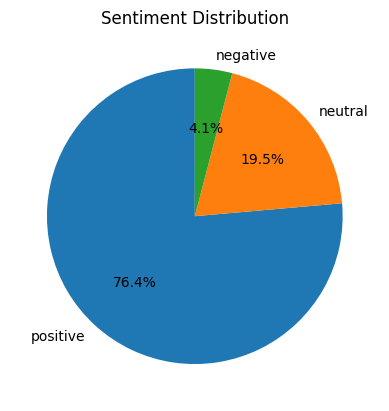

In [ ]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193154 entries, 0 to 196726
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Review_Id    193154 non-null  object        
 1   Review       193154 non-null  object        
 2   Ratings      193154 non-null  int64         
 3   Review_Date  193154 non-null  datetime64[ns]
 4   sentiment    193154 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.8+ MB


In [ ]:
df.set_index('Review_Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193154 entries, 2024-08-23 19:30:05 to 2023-11-30 18:11:41
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Review_Id  193154 non-null  object
 1   Review     193154 non-null  object
 2   Ratings    193154 non-null  int64 
 3   sentiment  193154 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.4+ MB


In [ ]:
sentiment_over_time = df.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack(fill_value=0)

# Step 4: Show output
print(sentiment_over_time)

sentiment    negative  neutral  positive
Review_Date                             
2023-07-31        477     1805      5972
2023-08-31        433     1433      4909
2023-09-30        385     1427      5753
2023-10-31        243     1165      4391
2023-11-30        388     1660      6636
2023-12-31        451     2038      7831
2024-01-31        453     1937      6875
2024-02-29        452     1703      6538
2024-03-31        649     3002     11429
2024-04-30        791     4417     18415
2024-05-31        927     5051     19631
2024-06-30        796     3522     13904
2024-07-31        797     4661     19684
2024-08-31        647     3884     15592


/tmp/ipython-input-133-2840936608.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_over_time = df.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack(fill_value=0)


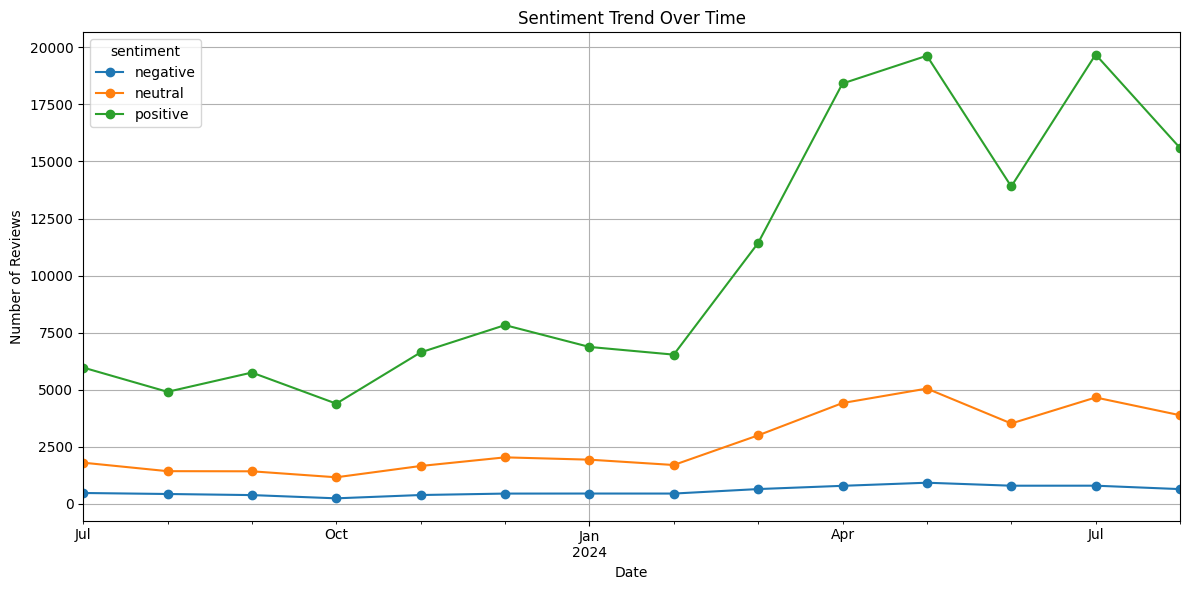

In [ ]:

sentiment_over_time.plot(marker='o', figsize=(12,6))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
count = df['Ratings'].value_counts()

print(count)



Ratings
5    147811
4     22422
1     11744
3      7911
2      3266
Name: count, dtype: int64


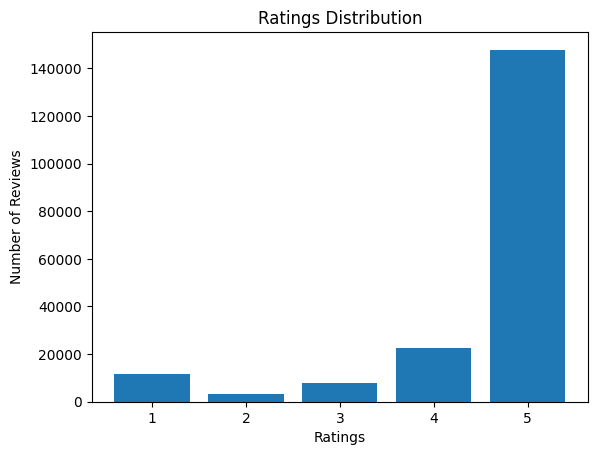

In [ ]:
plt.bar(count.index, count.values)
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()